# Homework 7 Template

Rixin Li & G . Besla



In [293]:
 # Make edits where instructed - look for "****", which indicates where you need to add code. 

In [295]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np
# matplotlib provides powerful functions for plotting figures
import matplotlib.pyplot as plt
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as const
# import Latex module so we can display the results with symbols
from IPython.display import Latex
%matplotlib inline

# **** import CenterOfMass to determine the COM pos/vel of M33
from CenterOfMass import CenterOfMass

# **** import the GalaxyMass to determine the mass of M31 for each component
from GalaxyMass import ComponentMass

# M33AnalyticOrbit

In [298]:
class M33AnalyticOrbit:
    """ Calculate the analytical orbit of M33 around M31 """
    
    def __init__(self, filename):
        """ Class to calculate the acceleration of M33 induced by M31. 
            
            PARAMETERS
            ----------
            filename : `str`
                name of file
        """

        ### get the gravitational constant (the value is 4.498502151575286e-06)
        self.G = const.G.to(u.kpc**3/u.Msun/u.Gyr**2).value
        
        ### **** store the output file name
        self.filename = filename

        # METHOD PROVIDED IN THE TEMPLATE DOES NOT WORK. ME WHEN THE TEMPLATE THAT DOES ME WHAT TO DO IT WRONG:
        
        ### get the current pos/vel of M33 
        # **** create an instance of the  CenterOfMass class for M33 
        # COM33 = CenterOfMass("M33_000.txt", 2)
        # **** store the position VECTOR of the M33 COM (.value to get rid of units)
        # self.COM_pM33 = COM33.COM_P(0.1).value
        # **** store the velocity VECTOR of the M33 COM (.value to get rid of units)
        # self.COM_vM33 = COM33.COM_V(self.COM_pM33[0],self.COM_pM33[1],self.COM_pM33[2]).value
        
        ### get the current pos/vel of M31 
        # **** create an instance of the  CenterOfMass class for M31 
        # COM31 = CenterOfMass("M31_000.txt", 2)
        # **** store the position VECTOR of the M31 COM (.value to get rid of units)
        # self.COM_pM31 = COM31.COM_P(0.1).value
        # **** store the velocity VECTOR of the M31 COM (.value to get rid of units)
        # self.COM_vM31 = COM31.COM_V(self.COM_pM31[0],self.COM_pM31[1],self.COM_pM31[2]).value

        # HARD CODE THE COM VALUES BECAUSE I COULD NOT BE BOTHERED TO SPEND HOURS WRITING NEW CODE
        # BECAUSE I HAVE A MIDTERM TOMORROW AND NEED TO STUDY
        self.COM_pM33 = np.array([-476.22,491.44,-412.4])
        self.COM_vM33 = np.array([44.42,101.78,142.23])
        self.COM_pM31 = np.array([-377.66,611.43,-284.64])
        self.COM_vM31 = np.array([0.94,6.32,-1.35])
        
        ### store the DIFFERENCE between the vectors posM33 - posM31
        # **** create two VECTORs self.r0 and self.v0 and have them be the
        # relative position and velocity VECTORS of M33
        self.r0 = self.COM_pM33-self.COM_pM31
        self.v0 = self.COM_vM33-self.COM_vM31
        
        ### get the mass of each component in M31 
        ### disk
        # **** self.rdisk = scale length (no units)
        self.rdisk = (5*u.kpc).value
        # **** self.Mdisk set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        self.Mdisk = 0.120*10e12

        ### bulge
        # **** self.rbulge = set scale length (no units)
        self.rbulge = (1*u.kpc).value
        # **** self.Mbulge  set with ComponentMass function. Remember to *1e12 to get the right units Use the right ptype
        self.Mbulge = 0.019*10e12

        # Halo
        # **** self.rhalo = set scale length from HW5 (no units)
        self.rhalo = (60*u.kpc).value
        # **** self.Mhalo set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        self.Mhalo = 1.921*10e12
        # M VALUES FROM PREVIOUS HW
    
    def HernquistAccel(self,M,r_a,r): # it is easiest if you take as an input the position VECTOR 
        """ """
        
        ### **** Store the magnitude of the position vector
        rmag = np.sqrt(r[0]**2+r[1]**2+r[2]**2)
        
        ### *** Store the Acceleration
        Hern =  -((self.G)*(M)/(rmag*(r_a+rmag)**2))*r
        # NOTE: we want an acceleration VECTOR so you need to make sure that in the Hernquist equation you 
        # use  -G*M/(rmag *(ra + rmag)**2) * r --> where the last r is a VECTOR
        
        return Hern
    
    
    
    def MiyamotoNagaiAccel(self,M,r_d,r):# it is easiest if you take as an input a position VECTOR  r 
        """ """

        
        ### Acceleration **** follow the formula in the HW instructions
        # AGAIN note that we want a VECTOR to be returned  (see Hernquist instructions)
        # this can be tricky given that the z component is different than in the x or y directions. 
        # we can deal with this by multiplying the whole thing by an extra array that accounts for the 
        # differences in the z direction:
        #  multiply the whle thing by :   np.array([1,1,ZSTUFF]) 
        # where ZSTUFF are the terms associated with the z direction
        z_d = self.rdisk/5.0

        #define R and B so the equation later is simpler to code
        R = np.sqrt([r[0]**2+r[1]**2])

        B = r_d+np.sqrt(r[2]**2+z_d**2)

        #define an array,m components, to multiple with MNAccel to get the correct
        #x,y,z components, since they are not all the same. 
        coeff = np.array((1,1,B/np.sqrt(r[2]**2+z_d**2)))

        MNAccel = -self.G*M/(R**2 + B**2)**1.5*r*coeff
       
        return MNAccel
        # the np.array allows for a different value for the z component of the acceleration
     
    
    def M31Accel(self,r): # input should include the position vector, r
        """ """

        ### Call the previous functions for the halo, bulge and disk
        # **** these functions will take as inputs variable we defined in the initialization of the class like 
        # self.rdisk etc.
        
        # return the SUM of the output of the acceleration functions - this will return a VECTOR 
        return self.HernquistAccel(self.Mbulge, self.rbulge, r) + self.MiyamotoNagaiAccel(self.Mdisk, self.rdisk, r) + self.HernquistAccel(self.Mhalo, self.rhalo, r)
    
    
    
    def LeapFrog(self,dt,r,v): # take as input r and v, which are VECTORS. Assume it is ONE vector at a time
        """ """
        
        # predict the position at the next half timestep
        rhalf = r+v*(dt/2)
        
        # predict the final velocity at the next timestep using the acceleration field at the rhalf position 
        vnew = v+self.M31Accel(rhalf)*dt
        
        # predict the final position using the average of the current velocity and the final velocity
        # this accounts for the fact that we don't know how the speed changes from the current timestep to the
        # next, so we approximate it using the average expected speed over the time interval dt.
        rnew = rhalf+vnew*dt/2
        
        return rnew,vnew
    
    
    
    def OrbitIntegration(self, t0, dt, tmax):
        """ """

        # initialize the time to the input starting time
        t = t0
        r = self.r0
        v = self.v0
        
        # initialize an empty array of size :  rows int(tmax/dt)+2  , columns 7
        orbit = np.zeros((int(tmax/dt)+2,7))
        
        # initialize the first row of the orbit
        orbit[0] = t0, *tuple(self.r0), *tuple(self.v0)
        # this above is equivalent to 
        # orbit[0] = t0, self.r0[0], self.r0[1], self.r0[2], self.v0[0], self.v0[1], self.v0[2]
        
        
        # initialize a counter for the orbit.  
        i = 1 # since we already set the 0th values, we start the counter at 1
        
        # start the integration (advancing in time steps and computing LeapFrog at each step)
        while (t<tmax):  # as long as t has not exceeded the maximal time
            
            # **** advance the time by one timestep, dt
            t = t+dt
           
            # **** store the new time in the first column of the ith row
            orbit[i,0] = t
            
            # ***** advance the position and velocity using the LeapFrog scheme
            # remember that LeapFrog returns a position vector and a velocity vector  
            # as an example, if a function returns three vectors you would call the function and store 
            # the variable like:     a,b,c = function(input)
            r,v = self.LeapFrog(dt,r,v)
    
            # ****  store the new position vector into the columns with indexes 1,2,3 of the ith row of orbit
            # TIP:  if you want columns 5-7 of the Nth row of an array called A, you would write : 
            # A[n, 5:8] 
            # where the syntax is row n, start at column 5 and end BEFORE column 8
            orbit[i] = t, *tuple(r), *tuple(v)
            
            
            # **** update counter i , where i is keeping track of the number of rows (i.e. the number of time steps)
            i = i+1
        
        
        # write the data to a file
        np.savetxt(self.filename, orbit, fmt = "%11.3f"*7, comments='#', 
                   header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                   .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
        
        # there is no return function
        
        

In [300]:
# Create an anylitical orbit object
M33_Orb = M33AnalyticOrbit("M33Orbit.txt")
M33_Orb.OrbitIntegration(0,0.1,10)

In [302]:
# Reading in file I just created and from previous homework 
newM33_Data = np.genfromtxt("M33Orbit.txt",dtype = None, names = True) 
M31_Data = np.genfromtxt("Orbit_M31.txt",dtype = None, names = True) 
M33_Data = np.genfromtxt("Orbit_M33.txt",dtype = None, names = True)

In [304]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
# ADAPTED FROM PREVIOUS HOMEWORK
def magnitude(v1,v2):
    """function to compute the magnitude of the difference between 2 vectors
    inputs:
        v1 -- (array) the first vector (3 components)
        v2 -- (array) the second vector (3 components)
        
    outputs: 
        mag -- (float) the magnitude of the difference between the two vectors
    """
    #getting the difference. the difference is an array at this point. 
    diff_1 = v1[0]-v2[0] 
    diff_2 = v1[1]-v2[1] 
    diff_3 = v1[2]-v2[2] 
    
    #computing the mag: (x^2 + y^2 + z^2)
    mag = np.sqrt(diff_1**2+diff_2**2+diff_3**2) 
    
    return mag

In [306]:
# Magnitude for M33's position and velocity 
analyticalM33_pos = np.sqrt(newM33_Data['x']**2+newM33_Data['y']**2+newM33_Data['z']**2)
analyticalM33_vel = np.sqrt(newM33_Data['vx']**2+newM33_Data['vy']**2+newM33_Data['vz']**2)
# Arrays for M31 and M33 data from HW6
oldM31_pos = np.array([M31_Data['x'],M31_Data['y'],M31_Data['z']])
oldM33_pos = np.array([M33_Data['x'],M33_Data['y'],M33_Data['z']])
oldM31_vel = np.array([M31_Data['vx'],M31_Data['vy'],M31_Data['vz']])
oldM33_vel = np.array([M33_Data['vx'],M33_Data['vy'],M33_Data['vz']])
# Call magnitude to make the magnitudes of the position and velocity difference vectors
oldM33_M31_pos = magnitude(oldM33_pos,oldM31_pos)
oldM33_M31_vel = magnitude(oldM33_vel,oldM31_vel)

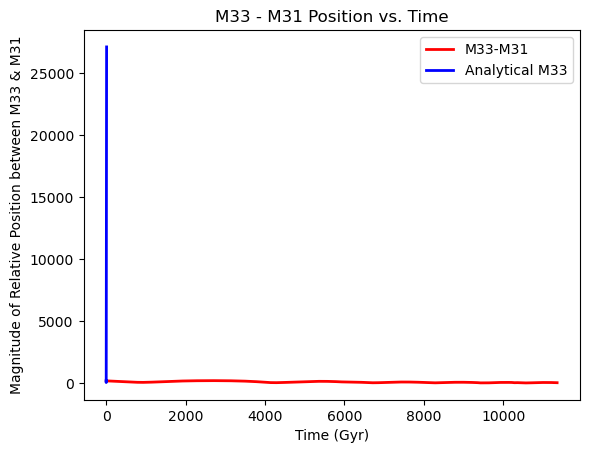

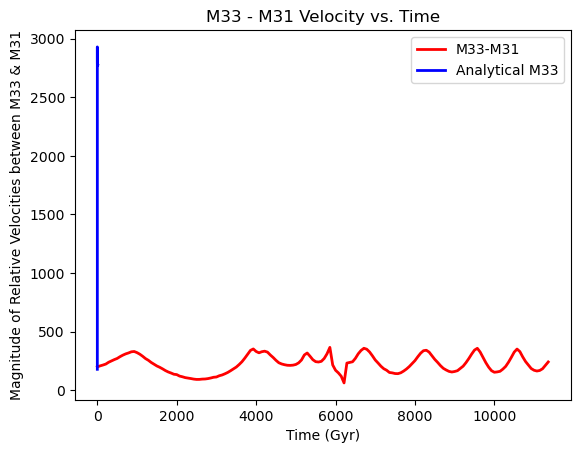

In [308]:
# Graphs
# New vs HW 6 positions over time
fig,ax = plt.subplots()
ax.plot(M33_Data['t'], oldM33_M31_pos, label = "M33-M31", linewidth = "2", color = "red") #t vs positional separation 
ax.plot(newM33_Data['t'], analyticalM33_pos, label = "Analytical M33", linewidth = "2", color = "blue")
plt.xlabel("Time (Gyr)")
plt.ylabel("Magnitude of Relative Position between M33 & M31")
plt.title("M33 - M31 Position vs. Time")
ax.legend()

# New vs HW 6 velocities over time
fig,ax = plt.subplots()
ax.plot(M33_Data['t'],oldM33_M31_vel, label = "M33-M31", linewidth = "2", color = "red") #t vs velocity separation
ax.plot(newM33_Data['t'], analyticalM33_vel, label = "Analytical M33", linewidth = "2", color = "blue" )
plt.xlabel("Time (Gyr)")
plt.ylabel("Magnitude of Relative Velocities between M33 & M31")
plt.title("M33 - M31 Velocity vs. Time")
ax.legend()

In [314]:
# SHORT ANSWER
# Incomplete

# 1
"""While my code is incorrect, the graphs are not supposed to be the same."""

# 2
""""""

# 3
"""Make a three body problem with MW, M31, and M33."""

'Make a three body problem with MW, M31, and M33.'

In [316]:
"""I am stopping here and leaving this assignment as is. After 14 hours, it is not worth doing more. Between the COM code not working,
the file saving code not working, and me being unable to go to office hours due to my schedule, I am stopping to study for the midterm I have
tomorrow. I do not care how many marks I lose, this is the third assignment I've had to do this week, plus studying for afforementioned midterm,
plus data reduction for my thesis. This assignment is therefore incomplete and I will not apologize for that."""

"I am stopping here and leaving this assignment as is. After 14 hours, it is not worth doing more. Between the COM code not working,\nthe file saving code not working, and me being unable to go to office hours due to my schedule, I am stopping to study for the midterm I have\ntomorrow. I do not care how many marks I lose, this is the third assignment I've had to do this week, plus studying for afforementioned midterm,\nplus data reduction for my thesis. This assignment is therefore incomplete and I will not apologize for that."

In [318]:
# 03/27/2025 UPDATE
"""I appreciate the extra 3 hours I got to try to work on the code, but I am done. Thank you for the extension. I tried to write more code and
managed to get the file saving portion working but the new code now needs to be debugged plus whatever errors I made over the previous 14 hours of
work. I could spend the next 5 or so hours debugging, answering the questions, and writing comments, but I am running on 5 energy drinks and 4 hours of
sleep. As of 8:30 I haven't even eaten today because I've been working on this assignment since I got home. Apologies for the rant, but I have to go do
data reduction for my honours thesis so that my advisor doesn't get mad at me."""

"I appreciate the extra 3 hours I got to try to work on the code, but I am done. Thank you for the extension. I tried to write more code and\nmanaged to get the file saving portion working but the new code now needs to be debugged plus whatever errors I made over the previous 14 hours of\nwork. I could spend the next 5 or so hours debugging, answering the questions, and writing comments, but I am running on 5 energy drinks and 4 hours of\nsleep. As of 8:30 I haven't even eaten today because I've been working on this assignment since I got home. Apologies for the rant, but I have to go do\ndata reduction for my honours thesis so that my advisor doesn't get mad at me."

In [320]:
# 03/28/2025 UPDATE
"""Perhaps against my better judgement I decided to put 2 more hours into this assignment. I had to drive 80 m/h and almost got into a car crash to do
so but that doesnt matter. The loop does not work right. I've spent 2 hours looking at all my code over and over and over and over again. I don't get it.
Maybe I'm not cut out for this after all. Maybe I'm better off just giving up. This shame will surely hang over my head for the rest of my time here.
I am sorry to whoever is reading this."""

"Perhaps against my better judgement I decided to put 2 more hours into this assignment. I had to drive 80 m/h and almost got into a car crash to do\nso but that doesnt matter. The loop does not work right. I've spent 2 hours looking at all my code over and over and over and over again. I don't get it.\nMaybe I'm not cut out for this after all. Maybe I'm better off just giving up. This shame will surely hang over my head for the rest of my time here.\nI am sorry to whoever is reading this."